# **Chicago Crime Data vs Weather - 2016** 

In [85]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [86]:
crime_categories = pd.read_csv('CrimeCategories.csv')
weather = pd.read_csv('temperature_2016.csv')
crime = pd.read_csv('Crime_data_2016.csv')

In [87]:
crime['Month']= pd.DatetimeIndex(crime['ShortDate']).month
crime.head()

,Unnamed: 0,Case Number,Primary Type,Date,ShortDate,Hour,Year,DateConvert,Month
0,646621,JA119772,THEFT,12/31/2016 23:59,12/31/2016,23,2016,4270523,12
1,646622,JA100016,BATTERY,12/31/2016 23:58,12/31/2016,23,2016,4270523,12
2,646623,JA100012,BATTERY,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
3,646624,JA100027,LIQUOR LAW VIOLATION,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
4,646625,JA100839,CRIMINAL DAMAGE,12/31/2016 23:54,12/31/2016,23,2016,4270523,12


#### Here we merge our weather and crime data then convert the ShortDate back into datetime format

In [88]:
df = pd.merge(weather, crime, on =['ShortDate','Hour'])
df['ShortDate'] = pd.to_datetime(df['ShortDate'],format='%m/%d/%Y')
print(df['ShortDate'].dtype)

datetime64[ns]


In [89]:
crime_categories.rename(columns={'crime primary type':'Primary Type'},inplace=True)
combined_df = df.merge(crime_categories, how='inner',on='Primary Type')

#### Need to set up bins to break our data up into smaller groups. First determine max and min to determine bin grouping

In [90]:
maxTemp = combined_df['Temp_Farenheit'].max()
minTemp = combined_df['Temp_Farenheit'].min()
print(f"The max temp is: {maxTemp}\nThe min temp is {minTemp}")

The max temp is: 91.634
The min temp is -9.777999999999999


#### Remove duplicate columns to keep dataframe clean

In [91]:
del combined_df['DateConvert_x']
del combined_df['Unnamed: 0']
del combined_df['DateConvert_y']
del combined_df['Date']

In [92]:
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal


In [93]:
bins = [-15,-5,5,15,25,35,45,55,65,75,85,95]
tempName = ['< -5 degrees','-5 to 4.9 degrees','5 to 14.9 degrees','15 to 24.9 degrees','25 to 34.9 degrees','35 to 44.9 degrees'\
            ,'45 to 54.9 degrees','55 to 64.9 degrees','65 to 74.9 degrees','75 to 84.9 degrees','85 to 95 degrees']
combined_df['TempBucket'] = pd.cut(combined_df['Temp_Farenheit'],bins,labels=tempName)
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket,TempBucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal,25 to 34.9 degrees
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal,25 to 34.9 degrees
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal,25 to 34.9 degrees
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal,25 to 34.9 degrees
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal,25 to 34.9 degrees


#### Prep data for scatter plot of total crime over temp

Text(0.5, 1.0, 'Temperature and Crime count by types')

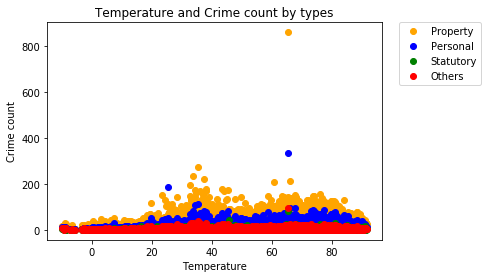

In [94]:
scatter_df = pd.pivot_table(combined_df,values='Case Number', index='Temp_Farenheit',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
scat_x = scatter_df.index.tolist()

Oth_scat = scatter_df[scatter_df.columns[0]]
Pers_scat = scatter_df[scatter_df.columns[1]]
Prop_scat = scatter_df[scatter_df.columns[2]]
Stat_scat = scatter_df[scatter_df.columns[3]]
# # scatter_df.to_csv(r'C:\Users\tepa7\Desktop\File Name.csv')
# ax = plt.plot(kind='scatter', x=scat_x, y=Oth_scat)
# plt.plot(scat_x,PersDF)

fig, ax = plt.subplots()
ax.plot(scat_x, Prop_scat,
        color = 'orange',
        linestyle='',
        marker='o', 
        label = 'Property')

ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',
        label = 'Personal')

ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        label = 'Statutory')

ax.plot(scat_x, Oth_scat, 
        color = 'red',
        linestyle='',
        marker='o',
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')

#### Updated the y-limit to remove the one outlier of 800+ crime commited

(-5, 400)

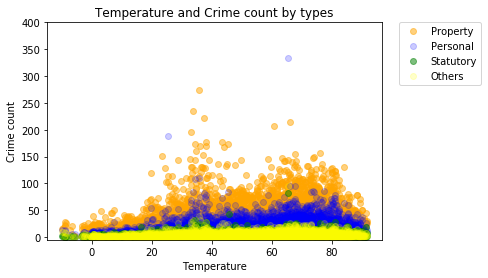

In [101]:
# Build the Scatter Plot 
fig, ax = plt.subplots()

ax.plot(scat_x, Prop_scat, 
        color = 'orange',
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,  
        label = 'Property')
ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',  
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Personal')
ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,
        label = 'Statutory')
ax.plot(scat_x, Oth_scat, 
        color = 'yellow', 
        linestyle='',
        marker='o', 
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')
ax.set_ylim(-5,400)

#### Create the pivot table and print to determine the column indices so we can extract a series for our line chart

In [97]:
buckets = pd.pivot_table(combined_df,values='Case Number', index='TempBucket',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets.head()

bucket,Other,Personal,Property,Statutory
TempBucket,,,,
< -5 degrees,51,79,180,8
-5 to 4.9 degrees,179,520,1392,141
5 to 14.9 degrees,391,1310,2937,306
15 to 24.9 degrees,1005,3233,7532,902
25 to 34.9 degrees,2439,8613,19144,2249


In [98]:
OthDF = buckets[buckets.columns[0]]
PersDF = buckets[buckets.columns[1]]
PropDF = buckets[buckets.columns[2]]
StatDF = buckets[buckets.columns[3]]
x = buckets.index.tolist()

In [ ]:
OthDF

In [ ]:
PersDF

In [ ]:
PropDF

In [ ]:
StatDF

In [ ]:
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by types')

plt.tight_layout()


In [ ]:
plt.plot(x,PersDF, label = 'Personal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
# t = arange(0.0, 2.0, 0.01)
# s = sin(2.5*pi*t)
# plot(t, s)

# xlabel('time (s)')
# ylabel('voltage (mV)')
# title('Sine Wave')
# grid(True)
# show()

In [ ]:
plt.plot(x,PropDF,label = 'Property')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
plt.plot(x,StatDF,label= 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
#pivot by month

buckets_month = pd.pivot_table(combined_df,values='Case Number', index='Month',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_month

In [ ]:
#plot crime by month
OthDF = buckets_month[buckets_month.columns[0]]
PersDF = buckets_month[buckets_month.columns[1]]
PropDF = buckets_month[buckets_month.columns[2]]
StatDF = buckets_month[buckets_month.columns[3]]
x = buckets_month.index.tolist()

plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by months')

plt.tight_layout()

In [ ]:
#pivot by hours
buckets_hour = pd.pivot_table(combined_df,values='Case Number', index='Hour',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_hour.head()

In [103]:
#Pie Charts of crimes inside each bucket/group 

combined_df




,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket,TempBucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal,25 to 34.9 degrees
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal,25 to 34.9 degrees
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal,25 to 34.9 degrees
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal,25 to 34.9 degrees
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal,25 to 34.9 degrees
5,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100032,BATTERY,2016,1,Personal,25 to 34.9 degrees
6,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ103526,BATTERY,2016,1,Personal,25 to 34.9 degrees
7,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100088,BATTERY,2016,1,Personal,25 to 34.9 degrees
8,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100039,BATTERY,2016,1,Personal,25 to 34.9 degrees
9,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ101144,BATTERY,2016,1,Personal,25 to 34.9 degrees


In [ ]:
#plot by hours
OthDF = buckets_hour[buckets_hour.columns[0]]
PersDF = buckets_hour[buckets_hour.columns[1]]
PropDF = buckets_hour[buckets_hour.columns[2]]
StatDF = buckets_hour[buckets_hour.columns[3]]
x = buckets_hour.index.tolist()

plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by hours')

plt.tight_layout()

In [ ]:
#pivot by degree and hours
buckets_degree_hour = pd.pivot_table(combined_df,values='Case Number', index='TempBucket',columns='Hour',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_degree_hour

In [ ]:
#why crime is so high in 65 to 74.9 degrees and when that happens?
buckets_degree65 = buckets_degree.loc['65 to 74.9 degrees']
buckets_degree65